In [1]:
#Library import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [2]:
# Simulate training and live data
np.random.seed(0)
train_chat = np.random.normal(35, 5, 10000)
live_chat = np.random.normal(35, 5, 10000)

In [3]:
# Combine into a DataFrame
df = pd.DataFrame({
    "chat": np.concatenate([train_chat, live_chat]),
    "source": ["train"]*10000 + ["live"]*10000
})

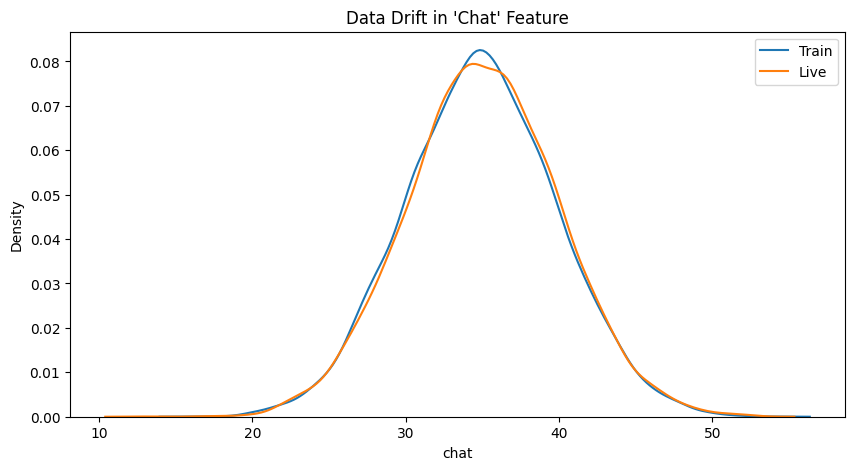

In [4]:
# Plot the distributions
plt.figure(figsize=(10,5))
sns.kdeplot(data=df[df["source"]=="train"], x="chat", label="Train")
sns.kdeplot(data=df[df["source"]=="live"], x="chat", label="Live")
plt.title("Data Drift in 'Chat' Feature")
plt.legend()
plt.show()

In [5]:
# KS Test for data drift
stat, p_value = ks_2samp(train_chat, live_chat)

print(f"KS Test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant data drift detected!")
else:
    print("No significant data drift detected.")

KS Test p-value: 0.0583
No significant data drift detected.
